In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1008. InVitroWildfire EVProteomics V2/P1008.3. Analyses/P1008.3.3. Volcano Plot/Output')
cur_date = "071522"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

#reading in file
protein_df = data.frame(read_excel("Input/071522_Statistical_Results_Only.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(protein_df)

,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02751,FN1,0.15124191,-0.7012756,0.49913274,0.55267499
2,P98160,HSPG2,-0.26474186,0.9684351,0.35788953,0.41404654
3,P12111,COL6A3,0.00133199,0.1345893,0.89584285,0.90855678
4,P21333,FLNA,0.40181862,-0.7809744,0.45351199,0.50821790
5,O00468,AGRN,-0.39882494,3.0168593,0.02400685,0.04093245
6,P35555,FBN1,0.16569919,-0.8028367,0.44216722,0.49851134


In [3]:
# adding a col to denote whether a protein had a significant p adjust value, log FC, or both

# add a column of NAs
protein_df$diffexpressed <- "No Significance"

# if p adjust is significant only
protein_df$diffexpressed[protein_df$P.Adj < 0.05] <- "P Adjust Only"

# if log2FC > log2(1.3) and P.Adj < 0.2, set as "UP" 
protein_df$diffexpressed[abs(protein_df$log2FC) > abs(log2(1.5)) & protein_df$P.Adj < 0.05] <- "P Adjust and log2 Fold Change"

# making into a factor
protein_df$diffexpressed = factor(protein_df$diffexpressed, levels = c("No Significance", "P Adjust Only", 
                                                                       "P Adjust and log2 Fold Change"))

# viewing df
head(protein_df)

,Protein,Gene.name,log2FC,Statistic,P.Value,P.Adj,diffexpressed
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,P02751,FN1,0.15124191,-0.7012756,0.49913274,0.55267499,No Significance
2,P98160,HSPG2,-0.26474186,0.9684351,0.35788953,0.41404654,No Significance
3,P12111,COL6A3,0.00133199,0.1345893,0.89584285,0.90855678,No Significance
4,P21333,FLNA,0.40181862,-0.7809744,0.45351199,0.50821790,No Significance
5,O00468,AGRN,-0.39882494,3.0168593,0.02400685,0.04093245,P Adjust Only
6,P35555,FBN1,0.16569919,-0.8028367,0.44216722,0.49851134,No Significance


# Volcano Plot

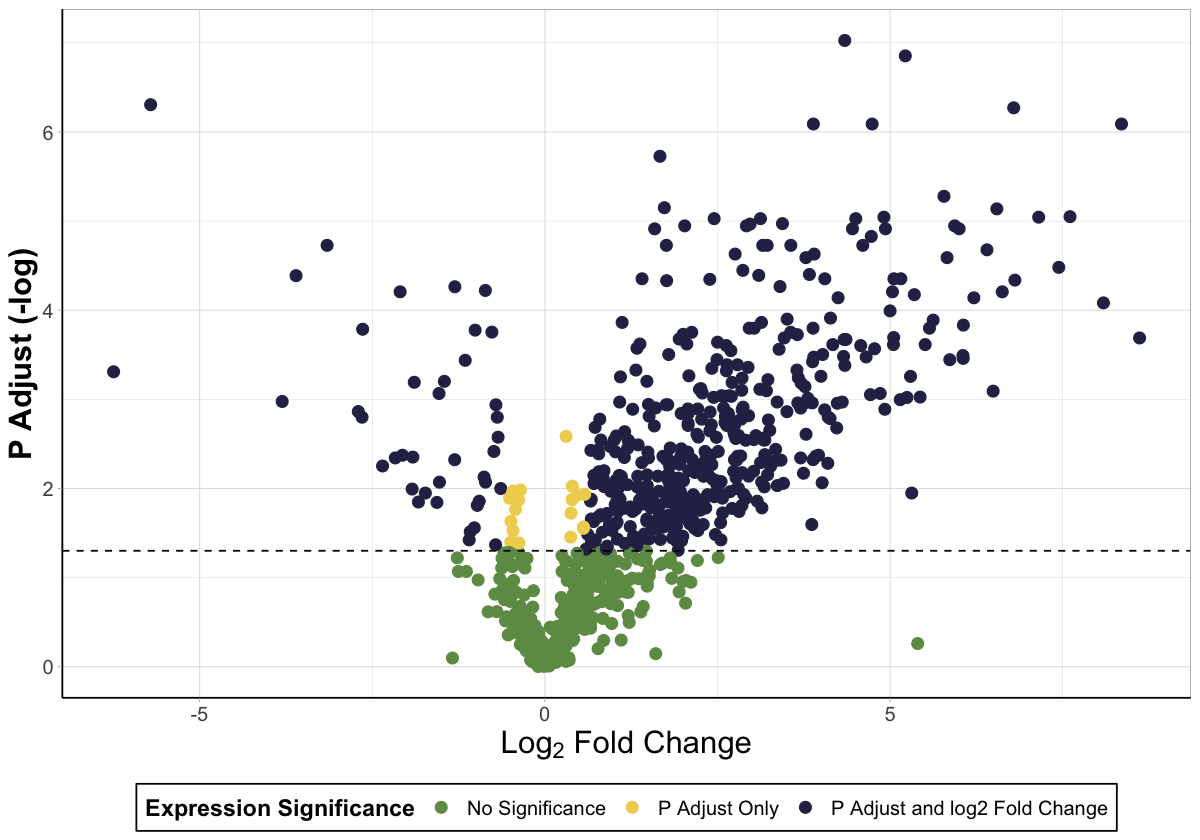

In [4]:
options(repr.plot.width=10, repr.plot.height=7) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$VanGogh1[[1]]

Figure6 = ggplot() + 
  geom_point(data = protein_df, aes(x = log2FC, y = -log10(P.Adj), color = diffexpressed), size = 3) + 

  # P Adjust line
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 


  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Expression Significance",
                      values = c(metbrewer_colors[7], '#F0D25E', metbrewer_colors[1]))

Figure6

In [5]:
# exporting figure
ggsave(Figure6, 
       filename = 'Figure6.pdf',
       path = Output,
       width = 10, height = 7)